In [185]:
from os import path
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from abacat import SequenceFile
from matplotlib import pyplot as plt
from scipy.cluster.vq import vq, kmeans
from matplotlib.patches import Patch, Ellipse
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
plt.style.use('seaborn-dark-palette')

In [186]:
# Importing data
df = pd.read_csv("../data/metadata.csv")
df = df[~df['checkm_completeness'].isna()]
df = df[df['quality_filter']]

# Format columns
def fill_rank(row, rank='genus'):
    ranks = {
        "genus": 0,
        "species": 1,
        "strain": 2
    }
    label = ""
    if row['is_synecho']:
        if ranks[rank] < 2:
            label = str(row['label'].split("_")[ranks[rank]])
        if len(label) > 1:
            pass
        else:
            label = str(row[f'gtdb_{rank}'])
    else:
        label += str(row[f'gtdb_{rank}'])
    return label

# Formatting columns
df["gc"] = df["gc"] * 100
df['new_genus'] = df.apply(lambda row: 'Other cyanobacteria' if row['is_synecho'] == False else row['new_genus'], axis=1)

In [193]:
def main(data, figsize=(15,15), **kwargs):
    fig = plt.figure(figsize=figsize)
    
    gs = GridSpec(
    nrows=3, ncols=2, height_ratios=[1,1,1], wspace=0.05
    )
    
    ax0 = fig.add_subplot()
    ax0.set_xlim((0, 7))
    ax0.set_ylim((30, 70))
    
    sns.scatterplot(x='megabases', y='gc', data=data, alpha=0.9,
                    hue=data["new_genus"],s=100, ax=ax0, zorder=1)
    if 'data_' in kwargs.keys():
        sns.scatterplot(x='megabases', y='gc', data=kwargs['data_'],
                        color='lightgray', alpha=0.7, s=100, ax=ax0, zorder=0)
        

    
    plt.show()

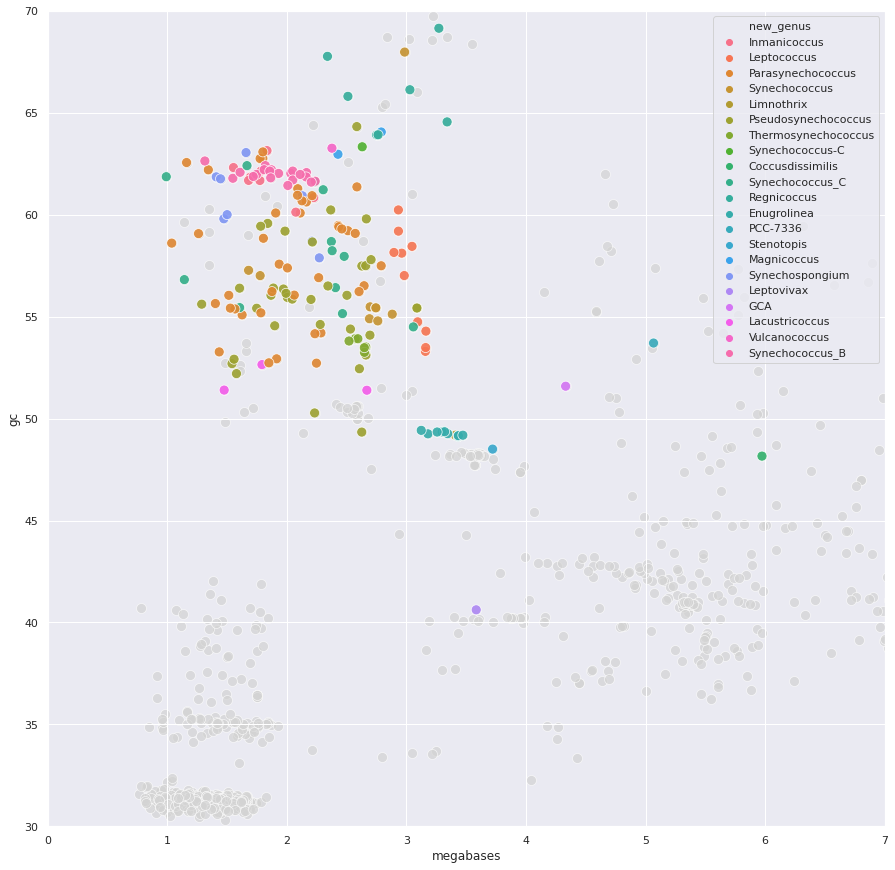

In [205]:
# Our draft
main(data=df[df['is_synecho'] & df['quality_filter']], data_=df[df['quality_filter']])

### Calculate egression to fit genome size to genome completeness

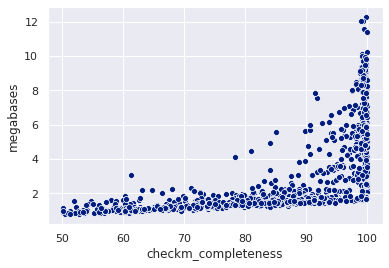

In [176]:
sns.scatterplot(x='checkm_completeness', y='megabases', data=df[df['quality_filter']])

In [167]:
def model(x, y):
    x = np.array(x.values).reshape((-1, 1))
    y = np.array(y.values)
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    model = LinearRegression(fit_intercept=False).fit(x_, y)
    r_sq = model.score(x_, y)
    
    return model, r_sq

In [168]:
model, r_sq = model(df['checkm_completeness'], df['megabases'])

In [171]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [173]:
model.intercept_

0.0